In [23]:
import pandas as pd
import csv
import sys
import os
from pathlib import Path
import random
import matplotlib.pyplot as plt

In [6]:
# Process file line by line until reach required word sample size
sample_size = 100_000

### Sample Creation Func

In [11]:
def filenames_from_folder(directory, filename, nof_samples):
    pathlist = Path(directory).glob(filename + '*.txt')

    rc = []
    for k, path in enumerate(pathlist):
        if k < nof_samples:
            rc.append(str(path)) # because path is object not string
        else:
            i = random.randint(0, k)
            if i < nof_samples:
                rc[i] = str(path)
    return rc

In [15]:
def create_sample(directory, file_name, rc, sample_size):
    fw = open(directory +"/" + file_name, "w", encoding="utf8")
    size = 0

    for file_path in rc:
        with open(file_path, 'r', encoding="utf8") as f:
            for line in f:
                if size >= sample_size:
                    break
                fw.write(line)
                size+= len(line.split())
    fw.close()

### Sample Analysis Func

In [17]:
class WordAnalysis(object):
    def __init__(self):
        self.wordsfreq = {}
        self.wordslen = {}
        self.words = []
        
    def add_word(self, word):
        if word not in self.words:
            self.words.append(word)
            self.wordsfreq[word] = 1
            word_len = len(word)
            
            if word_len in self.wordslen:
                self.wordslen[word_len] += 1
            else:
                self.wordslen[word_len] = 1
        else:
            self.wordsfreq[word] += 1
            word_len = len(word)
            self.wordslen[word_len] += 1

In [18]:
class Corpus(object):
    def __init__(self, path):
        self.analysis = WordAnalysis()
        self.data = self.process(os.path.join(path))

    def process(self, path):
        assert os.path.exists(path)
        # Add words to the dictionary
        with open(path, 'r', encoding="utf8") as f:
            for line in f:
                words = line.split() + ['<eos>']
                for word in words:
                    self.analysis.add_word(word)

        return 0

In [35]:
def average_word_len(dictionary):
    length = 0
    word_count = 0
    for key, value in dictionary.items():
        length += key * value
        word_count += value
    return (length/word_count)

## Data Analysis

In [68]:
data_loc = "raw_data"
adult_loc = "/Allthenews"
child_loc = "/child_CBT/CBTest/data"
inter_loc = "/fanfiction/SFGram-dataset-master/book-contents"

#### Adult Sample Analysis

In [56]:
adult_rc = filenames_from_folder(data_loc+adult_loc, "articles", 10)

In [57]:
create_sample(data_loc+adult_loc, "adult_sample.txt", adult_rc, sample_size)

In [58]:
corpus1 = Corpus(data_loc + adult_loc + "/" + "adult_sample.txt")

In [59]:
len(corpus1.analysis.words)

19431

In [60]:
# average word length
average_word_len(corpus1.analysis.wordslen)

4.85431584818094

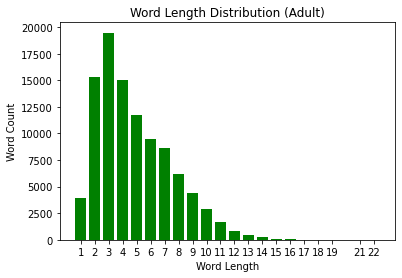

In [90]:
word_feq = corpus1.analysis.wordslen

plt.bar(list(word_feq.keys()), word_feq.values(), color='g')
plt.xticks(list(word_feq.keys()))
plt.title("Word Length Distribution (Adult)")
plt.xlabel('Word Length')
plt.ylabel('Word Count')
plt.show()

#### Child Sample Analysis

In [62]:
child_rc = filenames_from_folder(data_loc+child_loc, "cbt_", 10)

In [63]:
create_sample(data_loc+child_loc, "child_sample.txt", child_rc, sample_size)

In [64]:
corpus2 = Corpus(data_loc + child_loc + "/" + "child_sample.txt")

In [65]:
len(corpus2.analysis.words)

5787

In [66]:
# average word length
average_word_len(corpus2.analysis.wordslen)

3.709401956253851

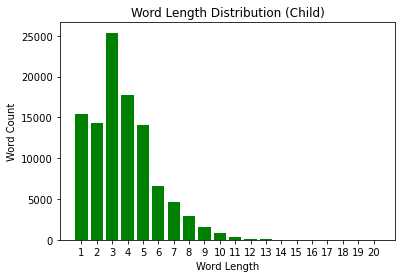

In [92]:
word_feq = corpus2.analysis.wordslen
#del word_feq[43]
plt.title("Word Length Distribution (Child)")
plt.xlabel('Word Length')
plt.ylabel('Word Count')
plt.bar(list(word_feq.keys()), word_feq.values(), color='g')
plt.xticks(list(word_feq.keys()))
plt.show()

#### Intermediate Sample Analysis

In [71]:
inter_rc = filenames_from_folder(data_loc + inter_loc, "book", 20)

In [72]:
create_sample(data_loc + inter_loc, "inter_sample.txt", inter_rc, sample_size)

In [73]:
corpus3 = Corpus(data_loc + inter_loc + "/" + "inter_sample.txt")

In [74]:
len(corpus3.analysis.words)

14158

In [75]:
# average word length
average_word_len(corpus3.analysis.wordslen)

4.380827057398621

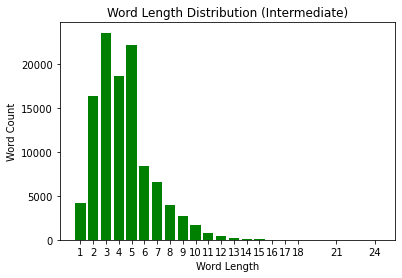

In [93]:
word_feq = corpus3.analysis.wordslen
plt.title("Word Length Distribution (Intermediate)")
plt.xlabel('Word Length')
plt.ylabel('Word Count')
plt.bar(list(word_feq.keys()), word_feq.values(), color='g')
plt.xticks(list(word_feq.keys()))
plt.show()

## Visutaion

In [78]:
adult_wordnum = len(corpus1.analysis.words)
child_wordnum = len(corpus2.analysis.words)
inter_wordnum = len(corpus3.analysis.words)

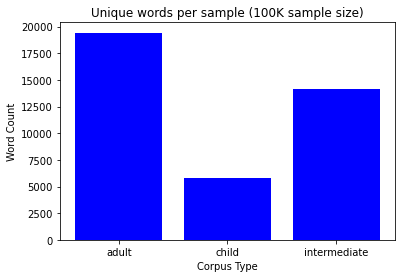

In [85]:
plt.bar(["adult", "child", "intermediate"],[adult_wordnum, child_wordnum, inter_wordnum], color='b')
plt.title("Unique words per sample (100K sample size)")
plt.xlabel('Corpus Type')
plt.ylabel('Word Count')
plt.show()

In [86]:
adult_avglen = average_word_len(corpus1.analysis.wordslen)
child_avglen = average_word_len(corpus2.analysis.wordslen)
inter_avglen = average_word_len(corpus3.analysis.wordslen)

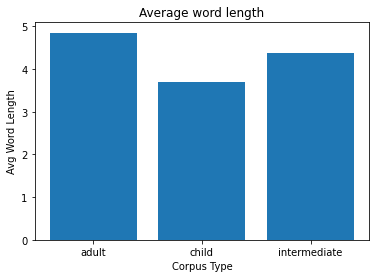

In [88]:
plt.bar(["adult", "child", "intermediate"],[adult_avglen, child_avglen, inter_avglen])
plt.title("Average word length")
plt.xlabel('Corpus Type')
plt.ylabel('Avg Word Length')
plt.show()